In [1]:
# Carregar bibliotecas
library(ggplot2)
library(dplyr)
library(scales)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)

In [15]:
# Definir dicionário de cores customizado
cores_instituicao <- c(
  "NUBANK" = "#a400c2",
  "MERCADO PAGO" = "#51b7f9",
  "PAGSEGURO" = "#9cd5d6",
  "C6" = "#282828",
  "SANTANDER" = "#f0001f",
  "INTER" = "#ff7232",
  "COOPERATIVAS" = "#07d57b",
  "ITAU" = "#ff612e",
  "CAIXA" = "#3a68b2",
  "BRADESCO" = "#da002d",
  "BB" = "#e7e14f",
  "OUTROS" = "#cccccc",
  "STONE" = "#00A868"
)

#### Gráfico do Slide de Condições por IF

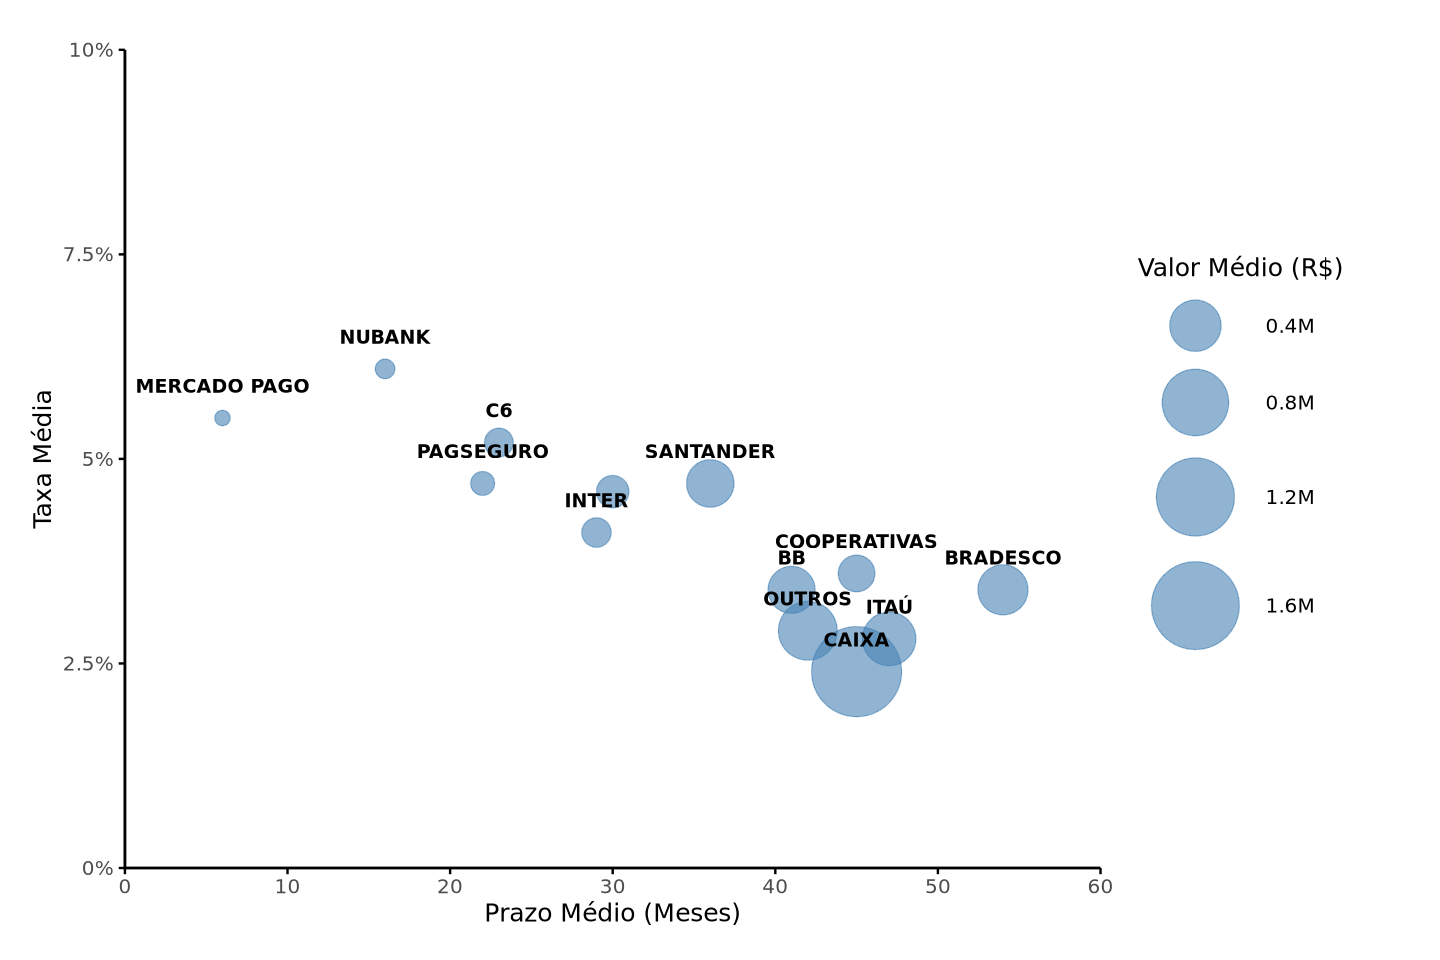

In [27]:
# 1. Dados e Processamento (Mantido)
dados <- data.frame(
  Instituicao = c("CAIXA", "OUTROS", "ITAÚ", "BRADESCO", "SANTANDER", "BB", 
                  "COOPERATIVAS", "NÃO CLASSIFICADO", "INTER", "C6", 
                  "PAGSEGURO", "NUBANK", "MERCADO PAGO"),
  Valor_Texto = c("1,7M", "579,0K", "448,5K", "372,4K", "319,0K", "310,0K", 
                  "144,0K", "93,8K", "66,9K", "61,3K", "29,0K", "12,2K", "6,8K"),
  Prazo_Medio = c(45, 42, 47, 54, 36, 41, 45, 30, 29, 23, 22, 16, 6),
  Taxa_Texto = c("2,4%", "2,9%", "2,8%", "3,4%", "4,7%", "3,4%", 
                 "3,6%", "4,6%", "4,1%", "5,2%", "4,7%", "6,1%", "5,5%")
)

dados$Taxa_Media <- as.numeric(gsub(",", ".", gsub("%", "", dados$Taxa_Texto)))
converter_valor <- function(x) {
  x <- gsub(",", ".", x)
  num <- as.numeric(gsub("[MK]", "", x))
  if (grepl("M", x)) return(num * 1e6)
  if (grepl("K", x)) return(num * 1e3)
  return(num)
}
dados$Valor_Medio <- sapply(dados$Valor_Texto, converter_valor)

# 2. Criar o Gráfico
p <- ggplot(dados, aes(x = Prazo_Medio, y = Taxa_Media, size = Valor_Medio)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  # Rótulos das instituições
  geom_text(aes(label = Instituicao), 
            vjust = -1.8, 
            size = 4, 
            family = "sans", 
            fontface = "bold",
            check_overlap = TRUE) +
  # Configuração dos eixos iniciando em 0 e terminando nos limites solicitados
  scale_x_continuous(limits = c(0, 60), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 10), 
                     labels = function(x) paste0(x, "%"), 
                     expand = c(0, 0)) +
  # Escala das bolhas
  scale_size_continuous(
    range = c(4, 25), 
    labels = unit_format(unit = "M", scale = 1e-6, sep = "")
  ) +
  labs(
    x = "Prazo Médio (Meses)",
    y = "Taxa Média",
    size = "Valor Médio (R$)"
  ) +
  # Customização do Tema: Remoção de grades e adição das linhas dos eixos
  theme_minimal(base_size = 15, base_family = "sans") +
  theme(
    panel.grid.major = element_blank(), # Remove grades principais
    panel.grid.minor = element_blank(), # Remove grades secundárias
    axis.line = element_line(color = "black", size = 0.8), # Adiciona as linhas x=0 e y=0
    axis.ticks = element_line(color = "black"), # Adiciona os tracinhos nos eixos
    plot.margin = margin(30, 50, 20, 20) # Margem para não cortar textos
  )

# 3. Salvar em alta resolução (16x8 conforme solicitado)
ggsave(
  filename = "grafico_mercado_limpo.png",
  plot = p,
  width = 16, 
  height = 8, 
  dpi = 500,
  bg = "white"
)

# Visualizar
print(p)

#### Gráfico do Slide de Condições por IF e PORTE

`geom_smooth()` using formula = 'y ~ x'


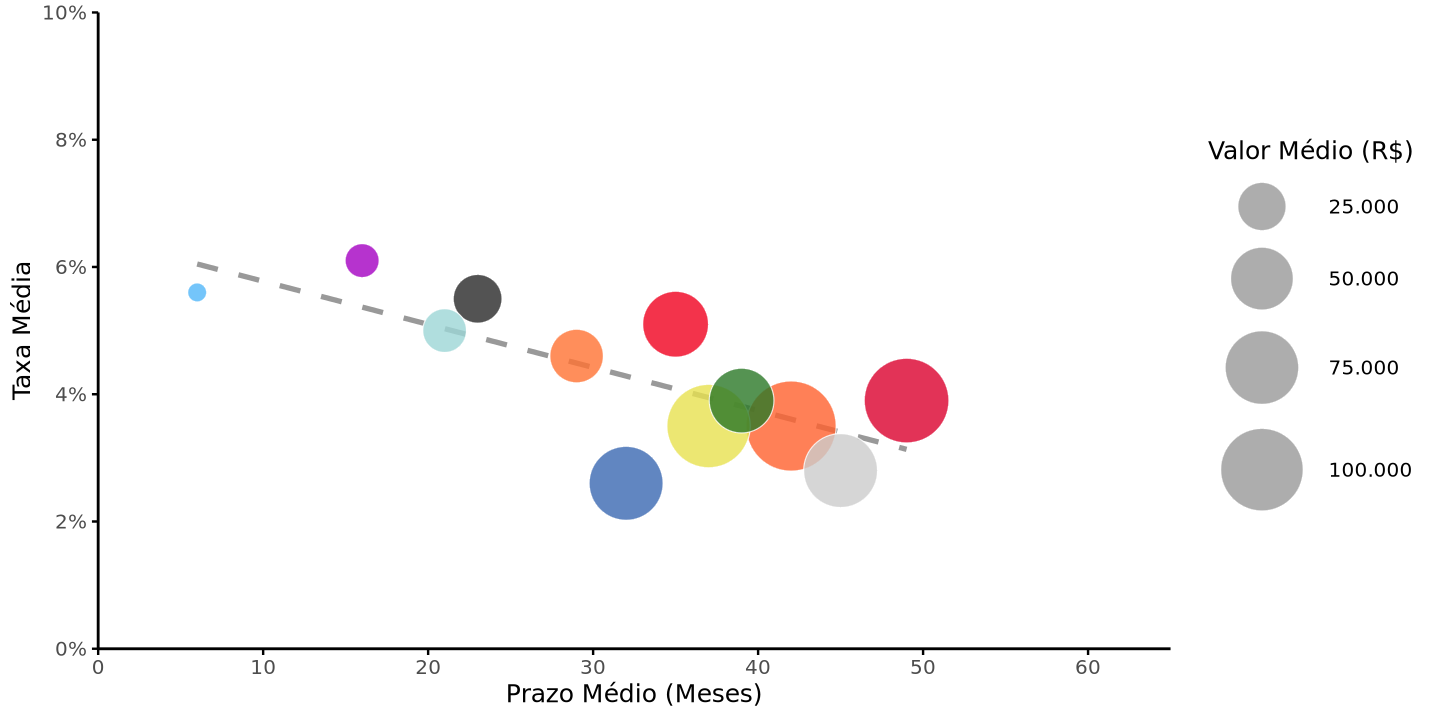

In [16]:
# Carregar bibliotecas
library(ggplot2)
library(dplyr)
library(scales)

# 1. Criar o dataframe
dados <- data.frame(
  Instituicao = c("ITAU", "BRADESCO", "BB", "CAIXA", "OUTROS", "SANTANDER", 
                  "COOPERATIVAS", "INTER", "C6", 
                  "PAGSEGURO", "NUBANK", "MERCADO PAGO"),
  Valor_Medio = c(124012.86, 106287.77, 102471.82, 75938.87, 75856.24, 56581.04, 
                  54117.57, 32942.54, 25647.21, 19281.62, 10119.92, 4854.70),
  Prazo_Medio = c(42, 49, 37, 32, 45, 35, 39, 29, 23, 21, 16, 6),
  Taxa_Texto = c("3,5%", "3,9%", "3,5%", "2,6%", "2,8%", "5,1%", 
                  "3,9%", "4,6%", "5,5%", "5,0%", "6,1%", "5,6%")
)

# Converter Taxa para numérico
dados$Taxa_Media <- as.numeric(gsub(",", ".", gsub("%", "", dados$Taxa_Texto)))

# 2. Criar o Gráfico
p <- ggplot(dados, aes(x = Prazo_Medio, y = Taxa_Media)) +
  # Linha de Regressão: Cor cinza da legenda e espessura aumentada (linewidth)
  geom_smooth(method = "lm", se = FALSE, color = "#999999", linetype = "dashed", linewidth = 1.5) + 
  
  # Scatterplot: fill mantém a cor nas bolas, mas show.legend = FALSE esconde a legenda de cores
  geom_point(aes(size = Valor_Medio, fill = Instituicao), 
             shape = 21, color = "white", alpha = 0.8) +
  
  # Configuração de Cores (aplicado às bolas)
  scale_fill_manual(values = cores_instituicao) +
  
  # Configuração de Tamanho (Mantém esta legenda visível)
  scale_size_continuous(
    range = c(5, 25), 
    labels = comma_format(big.mark = ".", decimal.mark = ","),
    guide = guide_legend(
      override.aes = list(fill = "#999999") # Cor cinza neutra para os círculos da legenda
    )
  ) +
  
  # REMOVE especificamente a legenda de cores/nomes das IFs
  guides(fill = "none") + 
  
  # Configuração dos eixos
  scale_x_continuous(limits = c(0, 65), breaks = seq(0, 60, 10), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 10), breaks = seq(0, 10, 2), 
                      labels = function(x) paste0(x, "%"), expand = c(0, 0)) +
  
  labs(
    x = "Prazo Médio (Meses)",
    y = "Taxa Média",
    size = "Valor Médio (R$)"
  ) +
  
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    axis.line = element_line(color = "black", linewidth = 0.8),
    axis.ticks = element_line(color = "black"),
    legend.position = "right"
  )

# 3. Visualizar
print(p)

`geom_smooth()` using formula = 'y ~ x'


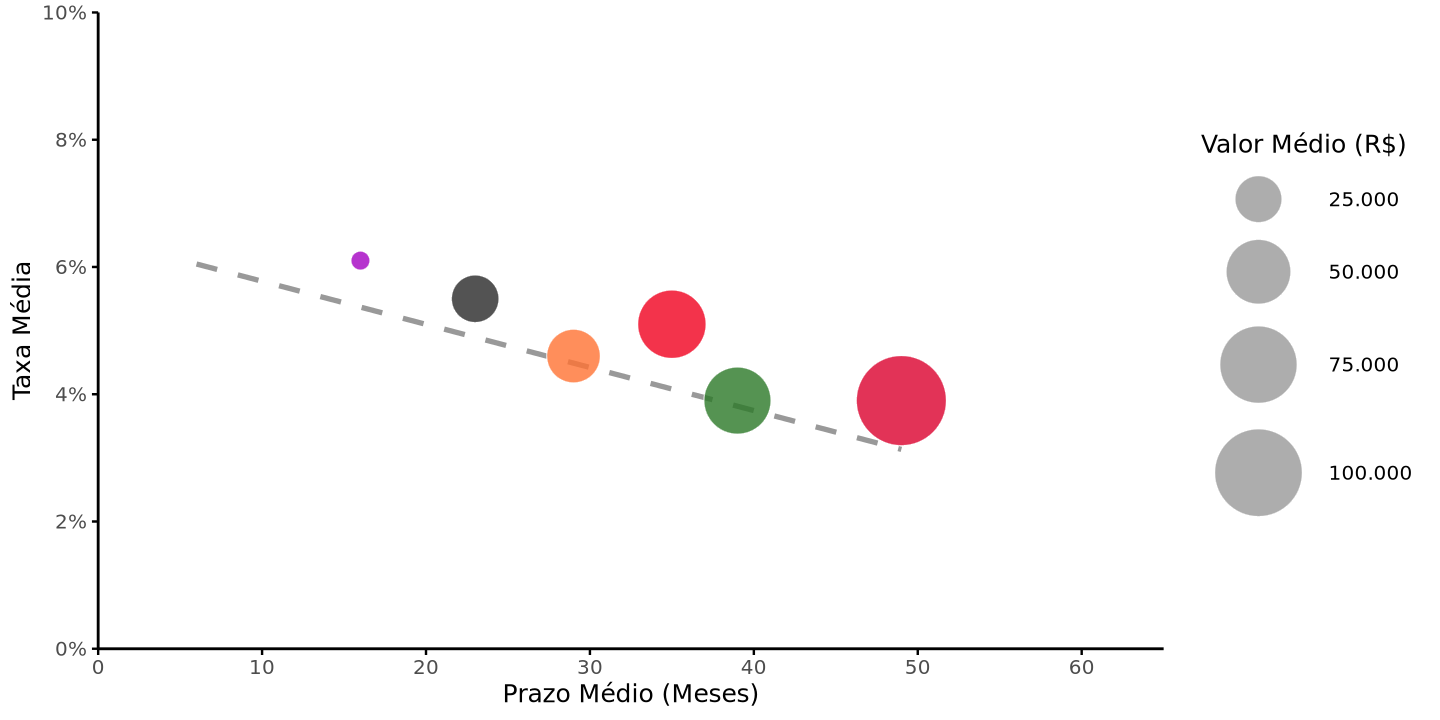

In [18]:
# Carregar bibliotecas
library(ggplot2)
library(dplyr)
library(scales)

# 1. Criar o dataframe
dados <- data.frame(
  Instituicao = c("ITAU", "BRADESCO", "BB", "CAIXA", "OUTROS", "SANTANDER", 
                  "COOPERATIVAS", "INTER", "C6", 
                  "PAGSEGURO", "NUBANK", "MERCADO PAGO"),
  Valor_Medio = c(124012.86, 106287.77, 102471.82, 75938.87, 75856.24, 56581.04, 
                  54117.57, 32942.54, 25647.21, 19281.62, 10119.92, 4854.70),
  Prazo_Medio = c(42, 49, 37, 32, 45, 35, 39, 29, 23, 21, 16, 6),
  Taxa_Texto = c("3,5%", "3,9%", "3,5%", "2,6%", "2,8%", "5,1%", 
                  "3,9%", "4,6%", "5,5%", "5,0%", "6,1%", "5,6%")
)

# Converter Taxa para numérico
dados$Taxa_Media <- as.numeric(gsub(",", ".", gsub("%", "", dados$Taxa_Texto)))

# --- NOVIDADE: Cálculo da Regressão e Filtro ---
modelo <- lm(Taxa_Media ~ Prazo_Medio, data = dados)
dados$Predito <- predict(modelo)
dados_filtrados <- dados %>% filter(Taxa_Media > Predito)
# ----------------------------------------------

# 2. Criar o Gráfico
p <- ggplot(dados, aes(x = Prazo_Medio, y = Taxa_Media)) +
  # Linha de Regressão: Mantemos os 'dados' completos para a linha não mudar de lugar
  geom_smooth(data = dados, method = "lm", se = FALSE, color = "#999999", 
              linetype = "dashed", linewidth = 1.5) + 
  
  # Scatterplot: Usamos apenas os 'dados_filtrados' para mostrar só quem está acima
  geom_point(data = dados_filtrados, aes(size = Valor_Medio, fill = Instituicao), 
             shape = 21, color = "white", alpha = 0.8) +
  
  # Configuração de Cores (Nota: certifique-se que 'cores_instituicao' está definido ou use scale_fill_hue)
  scale_fill_manual(values = cores_instituicao) +
  
  # Configuração de Tamanho
  scale_size_continuous(
    range = c(5, 25), 
    labels = comma_format(big.mark = ".", decimal.mark = ","),
    guide = guide_legend(override.aes = list(fill = "#999999"))
  ) +
  
  guides(fill = "none") + 
  
  scale_x_continuous(limits = c(0, 65), breaks = seq(0, 60, 10), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 10), breaks = seq(0, 10, 2), 
                     labels = function(x) paste0(x, "%"), expand = c(0, 0)) +
  
  labs(
    x = "Prazo Médio (Meses)",
    y = "Taxa Média",
    size = "Valor Médio (R$)"
  ) +
  
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    axis.line = element_line(color = "black", linewidth = 0.8),
    axis.ticks = element_line(color = "black"),
    legend.position = "right"
  )

# 3. Visualizar
print(p)

`geom_smooth()` using formula = 'y ~ x'


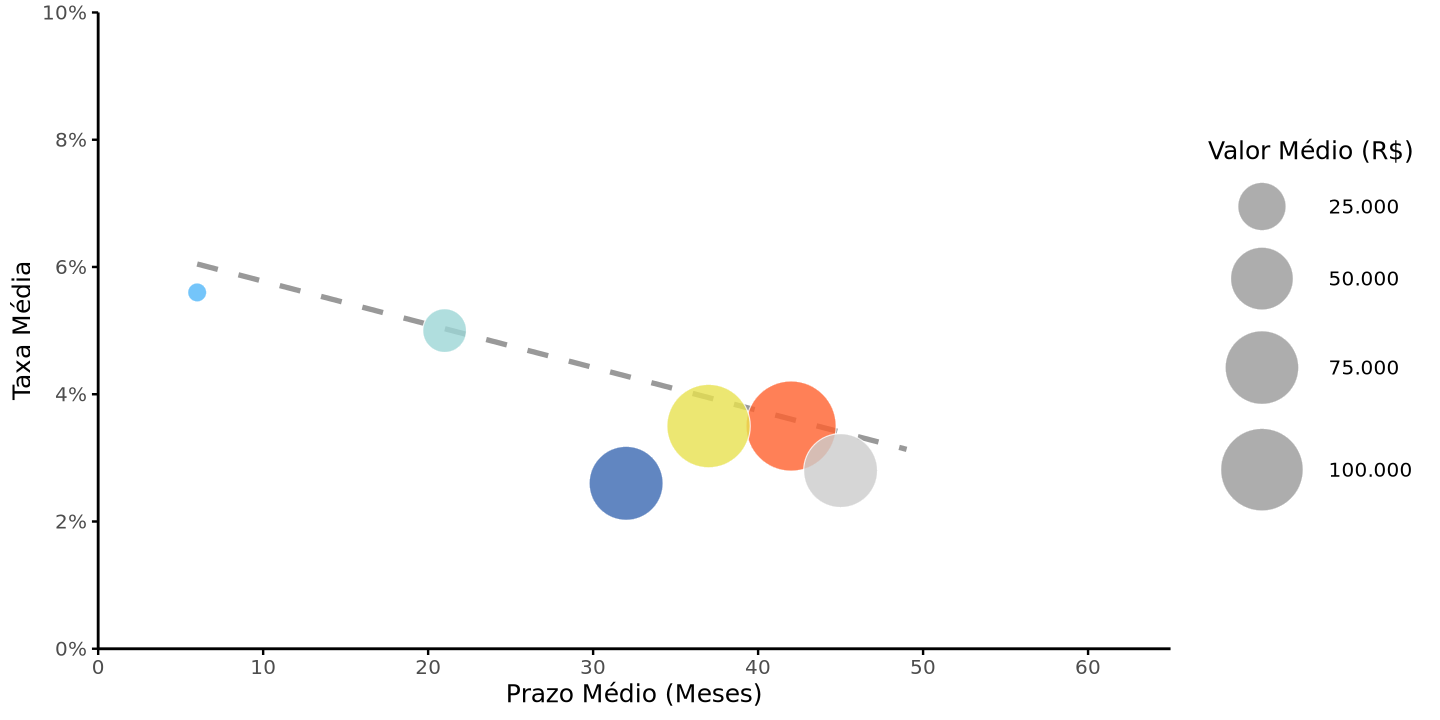

In [19]:
# Carregar bibliotecas
library(ggplot2)
library(dplyr)
library(scales)

# 1. Criar o dataframe
dados <- data.frame(
  Instituicao = c("ITAU", "BRADESCO", "BB", "CAIXA", "OUTROS", "SANTANDER", 
                  "COOPERATIVAS", "INTER", "C6", 
                  "PAGSEGURO", "NUBANK", "MERCADO PAGO"),
  Valor_Medio = c(124012.86, 106287.77, 102471.82, 75938.87, 75856.24, 56581.04, 
                  54117.57, 32942.54, 25647.21, 19281.62, 10119.92, 4854.70),
  Prazo_Medio = c(42, 49, 37, 32, 45, 35, 39, 29, 23, 21, 16, 6),
  Taxa_Texto = c("3,5%", "3,9%", "3,5%", "2,6%", "2,8%", "5,1%", 
                  "3,9%", "4,6%", "5,5%", "5,0%", "6,1%", "5,6%")
)

# Converter Taxa para numérico
dados$Taxa_Media <- as.numeric(gsub(",", ".", gsub("%", "", dados$Taxa_Texto)))

# --- NOVIDADE: Cálculo da Regressão e Filtro ---
modelo <- lm(Taxa_Media ~ Prazo_Medio, data = dados)
dados$Predito <- predict(modelo)
dados_filtrados <- dados %>% filter(Taxa_Media < Predito)
# ----------------------------------------------

# 2. Criar o Gráfico
p <- ggplot(dados, aes(x = Prazo_Medio, y = Taxa_Media)) +
  # Linha de Regressão: Mantemos os 'dados' completos para a linha não mudar de lugar
  geom_smooth(data = dados, method = "lm", se = FALSE, color = "#999999", 
              linetype = "dashed", linewidth = 1.5) + 
  
  # Scatterplot: Usamos apenas os 'dados_filtrados' para mostrar só quem está acima
  geom_point(data = dados_filtrados, aes(size = Valor_Medio, fill = Instituicao), 
             shape = 21, color = "white", alpha = 0.8) +
  
  # Configuração de Cores (Nota: certifique-se que 'cores_instituicao' está definido ou use scale_fill_hue)
  scale_fill_manual(values = cores_instituicao) +
  
  # Configuração de Tamanho
  scale_size_continuous(
    range = c(5, 25), 
    labels = comma_format(big.mark = ".", decimal.mark = ","),
    guide = guide_legend(override.aes = list(fill = "#999999"))
  ) +
  
  guides(fill = "none") + 
  
  scale_x_continuous(limits = c(0, 65), breaks = seq(0, 60, 10), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 10), breaks = seq(0, 10, 2), 
                     labels = function(x) paste0(x, "%"), expand = c(0, 0)) +
  
  labs(
    x = "Prazo Médio (Meses)",
    y = "Taxa Média",
    size = "Valor Médio (R$)"
  ) +
  
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    axis.line = element_line(color = "black", linewidth = 0.8),
    axis.ticks = element_line(color = "black"),
    legend.position = "right"
  )

# 3. Visualizar
print(p)

`geom_smooth()` using formula = 'y ~ x'


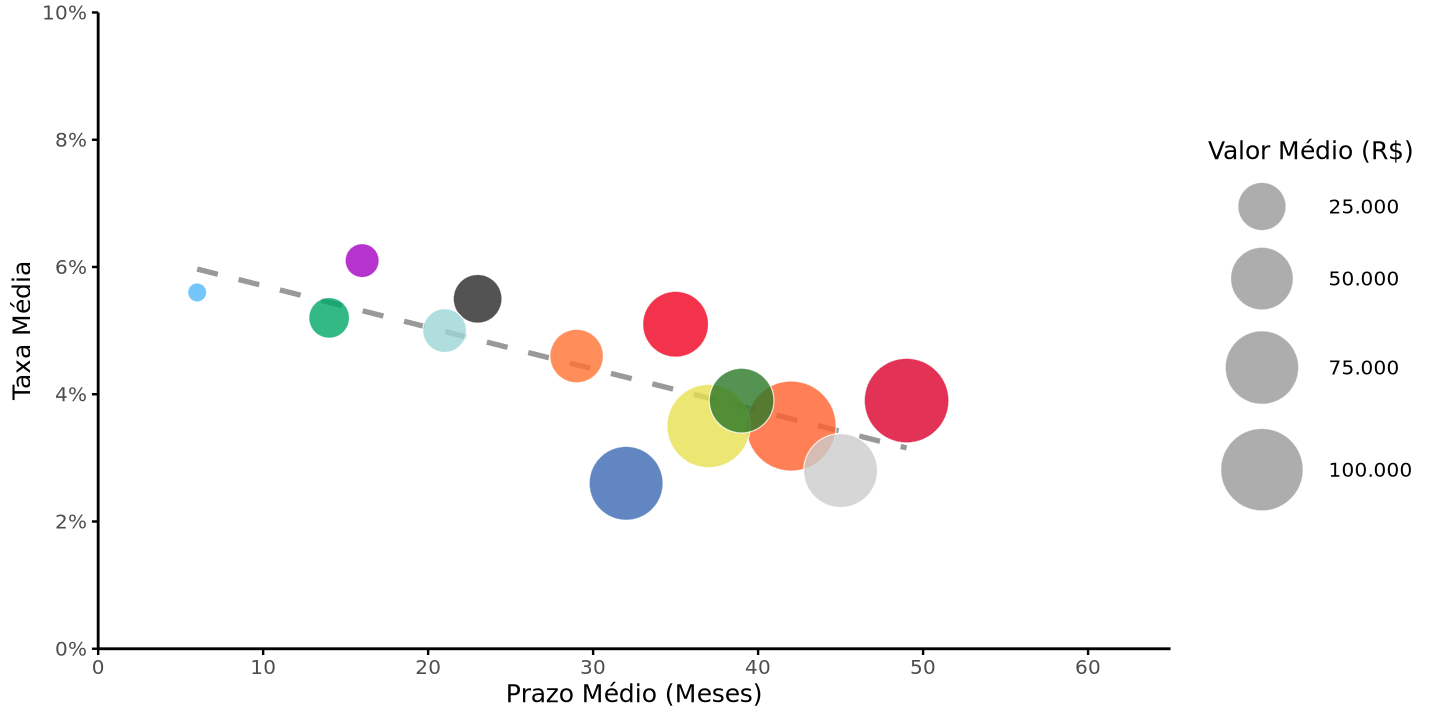

In [35]:
# Carregar bibliotecas
library(ggplot2)
library(dplyr)
library(scales)

# 1. Criar o dataframe
dados <- data.frame(
  Instituicao = c("STONE","ITAU", "BRADESCO", "BB", "CAIXA", "OUTROS", "SANTANDER", 
                  "COOPERATIVAS", "INTER", "C6", 
                  "PAGSEGURO", "NUBANK", "MERCADO PAGO"),
  Valor_Medio = c(15984.04,124012.86, 106287.77, 102471.82, 75938.87, 75856.24, 56581.04, 
                  54117.57, 32942.54, 25647.21, 19281.62, 10119.92, 4854.70),
  Prazo_Medio = c(14,42, 49, 37, 32, 45, 35, 39, 29, 23, 21, 16, 6),
  Taxa_Texto = c("5,2%","3,5%", "3,9%", "3,5%", "2,6%", "2,8%", "5,1%", 
                  "3,9%", "4,6%", "5,5%", "5,0%", "6,1%", "5,6%")
)

# Converter Taxa para numérico
dados$Taxa_Media <- as.numeric(gsub(",", ".", gsub("%", "", dados$Taxa_Texto)))

# 2. Criar o Gráfico
p <- ggplot(dados, aes(x = Prazo_Medio, y = Taxa_Media)) +
  # Linha de Regressão: Cor cinza da legenda e espessura aumentada (linewidth)
  geom_smooth(method = "lm", se = FALSE, color = "#999999", linetype = "dashed", linewidth = 1.5) + 
  
  # Scatterplot: fill mantém a cor nas bolas, mas show.legend = FALSE esconde a legenda de cores
  geom_point(aes(size = Valor_Medio, fill = Instituicao), 
             shape = 21, color = "white", alpha = 0.8) +
  
  # Configuração de Cores (aplicado às bolas)
  scale_fill_manual(values = cores_instituicao) +
  
  # Configuração de Tamanho (Mantém esta legenda visível)
  scale_size_continuous(
    range = c(5, 25), 
    labels = comma_format(big.mark = ".", decimal.mark = ","),
    guide = guide_legend(
      override.aes = list(fill = "#999999") # Cor cinza neutra para os círculos da legenda
    )
  ) +
  
  # REMOVE especificamente a legenda de cores/nomes das IFs
  guides(fill = "none") + 
  
  # Configuração dos eixos
  scale_x_continuous(limits = c(0, 65), breaks = seq(0, 60, 10), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 10), breaks = seq(0, 10, 2), 
                      labels = function(x) paste0(x, "%"), expand = c(0, 0)) +
  
  labs(
    x = "Prazo Médio (Meses)",
    y = "Taxa Média",
    size = "Valor Médio (R$)"
  ) +
  
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    axis.line = element_line(color = "black", linewidth = 0.8),
    axis.ticks = element_line(color = "black"),
    legend.position = "right"
  )

# 3. Visualizar
print(p)

`geom_smooth()` using formula = 'y ~ x'


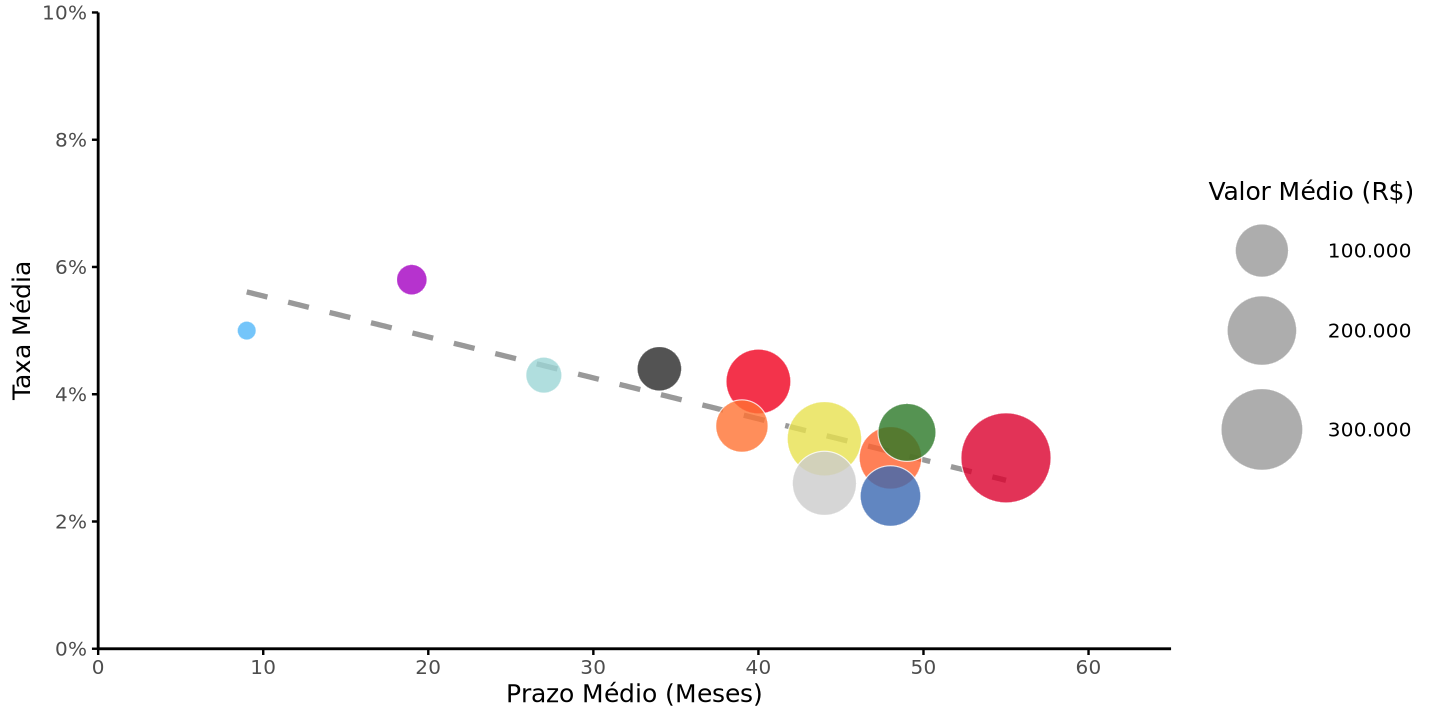

In [21]:
# Carregar bibliotecas
library(ggplot2)
library(dplyr)
library(scales)

# 1. Criar o dataframe com os novos dados
dados <- data.frame(
  Instituicao = c("BRADESCO", "BB", "SANTANDER", "OUTROS", "ITAU", "CAIXA", 
                  "COOPERATIVAS", "INTER", "C6", "PAGSEGURO", 
                  "NUBANK", "MERCADO PAGO"),
  Valor_Medio = c(381259.02, 237627.16, 166781.72, 162906.91, 152631.56, 140366.44, 
                  124872.57, 95849.41, 62197.02, 36051.78, 24671.09, 14959.44),
  Prazo_Medio = c(55, 44, 40, 44, 48, 48, 49, 39, 34, 27, 19, 9),
  Taxa_Texto = c("3,0%", "3,3%", "4,2%", "2,6%", "3,0%", "2,4%", 
                 "3,4%", "3,5%", "4,4%", "4,3%", "5,8%", "5,0%")
)

# Converter Taxa para numérico
dados$Taxa_Media <- as.numeric(gsub(",", ".", gsub("%", "", dados$Taxa_Texto)))

# 2. Criar o Gráfico
p <- ggplot(dados, aes(x = Prazo_Medio, y = Taxa_Media)) +
  # Linha de Regressão: Cor cinza da legenda e espessura aumentada (linewidth)
  geom_smooth(method = "lm", se = FALSE, color = "#999999", linetype = "dashed", linewidth = 1.5) + 
  
  # Scatterplot: fill mantém a cor nas bolas, mas show.legend = FALSE esconde a legenda de cores
  geom_point(aes(size = Valor_Medio, fill = Instituicao), 
             shape = 21, color = "white", alpha = 0.8) +
  
  # Configuração de Cores (aplicado às bolas)
  scale_fill_manual(values = cores_instituicao) +
  
  # Configuração de Tamanho (Mantém esta legenda visível)
  scale_size_continuous(
    range = c(5, 25), 
    labels = comma_format(big.mark = ".", decimal.mark = ","),
    guide = guide_legend(
      override.aes = list(fill = "#999999") # Cor cinza neutra para os círculos da legenda
    )
  ) +
  
  # REMOVE especificamente a legenda de cores/nomes das IFs
  guides(fill = "none") + 
  
  # Configuração dos eixos
  scale_x_continuous(limits = c(0, 65), breaks = seq(0, 60, 10), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 10), breaks = seq(0, 10, 2), 
                      labels = function(x) paste0(x, "%"), expand = c(0, 0)) +
  
  labs(
    x = "Prazo Médio (Meses)",
    y = "Taxa Média",
    size = "Valor Médio (R$)"
  ) +
  
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    axis.line = element_line(color = "black", linewidth = 0.8),
    axis.ticks = element_line(color = "black"),
    legend.position = "right"
  )

# 3. Visualizar
print(p)

`geom_smooth()` using formula = 'y ~ x'


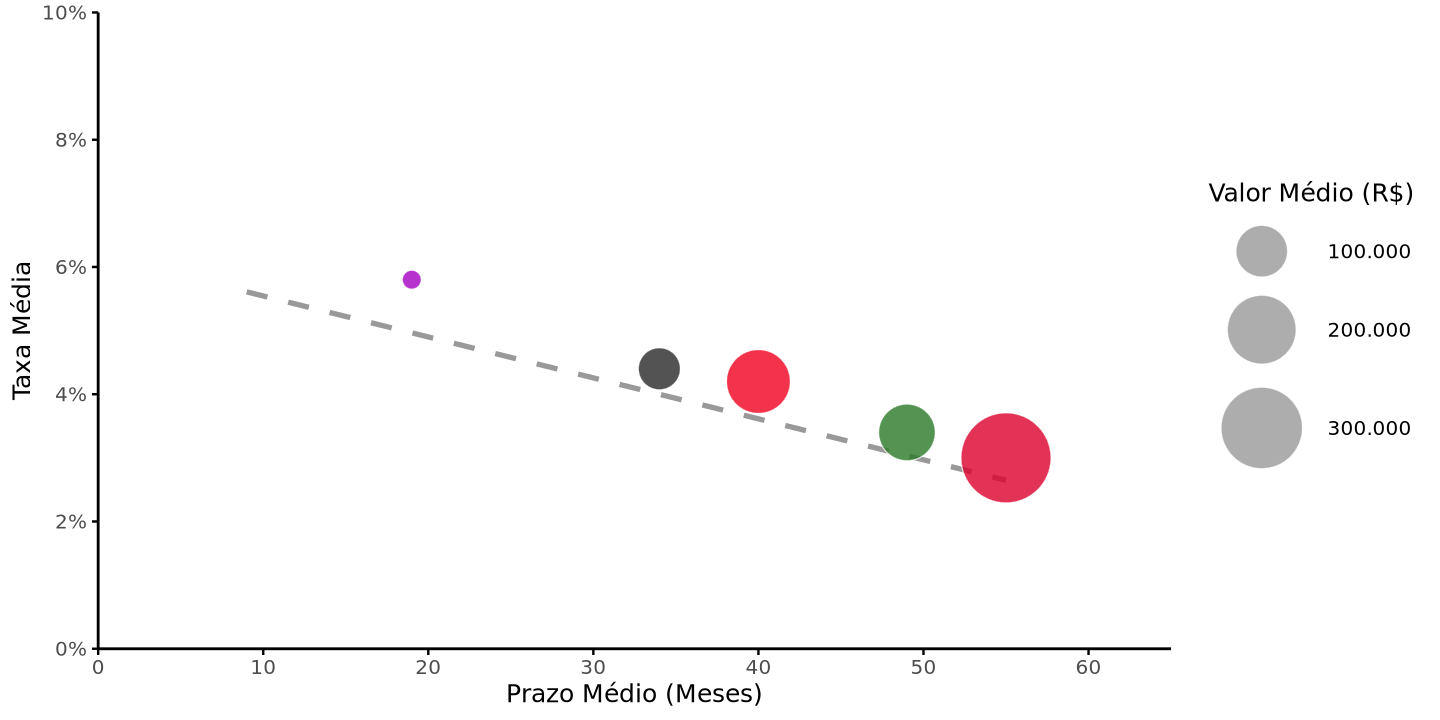

In [22]:
# Carregar bibliotecas
library(ggplot2)
library(dplyr)
library(scales)

# 1. Criar o dataframe com os novos dados
dados <- data.frame(
  Instituicao = c("BRADESCO", "BB", "SANTANDER", "OUTROS", "ITAU", "CAIXA", 
                  "COOPERATIVAS", "INTER", "C6", "PAGSEGURO", 
                  "NUBANK", "MERCADO PAGO"),
  Valor_Medio = c(381259.02, 237627.16, 166781.72, 162906.91, 152631.56, 140366.44, 
                  124872.57, 95849.41, 62197.02, 36051.78, 24671.09, 14959.44),
  Prazo_Medio = c(55, 44, 40, 44, 48, 48, 49, 39, 34, 27, 19, 9),
  Taxa_Texto = c("3,0%", "3,3%", "4,2%", "2,6%", "3,0%", "2,4%", 
                 "3,4%", "3,5%", "4,4%", "4,3%", "5,8%", "5,0%")
)

# Converter Taxa para numérico
dados$Taxa_Media <- as.numeric(gsub(",", ".", gsub("%", "", dados$Taxa_Texto)))


# --- NOVIDADE: Cálculo da Regressão e Filtro ---
modelo <- lm(Taxa_Media ~ Prazo_Medio, data = dados)
dados$Predito <- predict(modelo)
dados_filtrados <- dados %>% filter(Taxa_Media > Predito)
# ----------------------------------------------

# 2. Criar o Gráfico
p <- ggplot(dados, aes(x = Prazo_Medio, y = Taxa_Media)) +
  # Linha de Regressão: Mantemos os 'dados' completos para a linha não mudar de lugar
  geom_smooth(data = dados, method = "lm", se = FALSE, color = "#999999", 
              linetype = "dashed", linewidth = 1.5) + 
  
  # Scatterplot: Usamos apenas os 'dados_filtrados' para mostrar só quem está acima
  geom_point(data = dados_filtrados, aes(size = Valor_Medio, fill = Instituicao), 
             shape = 21, color = "white", alpha = 0.8) +
  
  # Configuração de Cores (Nota: certifique-se que 'cores_instituicao' está definido ou use scale_fill_hue)
  scale_fill_manual(values = cores_instituicao) +
  
  # Configuração de Tamanho
  scale_size_continuous(
    range = c(5, 25), 
    labels = comma_format(big.mark = ".", decimal.mark = ","),
    guide = guide_legend(override.aes = list(fill = "#999999"))
  ) +
  
  guides(fill = "none") + 
  
  scale_x_continuous(limits = c(0, 65), breaks = seq(0, 60, 10), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 10), breaks = seq(0, 10, 2), 
                     labels = function(x) paste0(x, "%"), expand = c(0, 0)) +
  
  labs(
    x = "Prazo Médio (Meses)",
    y = "Taxa Média",
    size = "Valor Médio (R$)"
  ) +
  
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    axis.line = element_line(color = "black", linewidth = 0.8),
    axis.ticks = element_line(color = "black"),
    legend.position = "right"
  )

# 3. Visualizar
print(p)

`geom_smooth()` using formula = 'y ~ x'


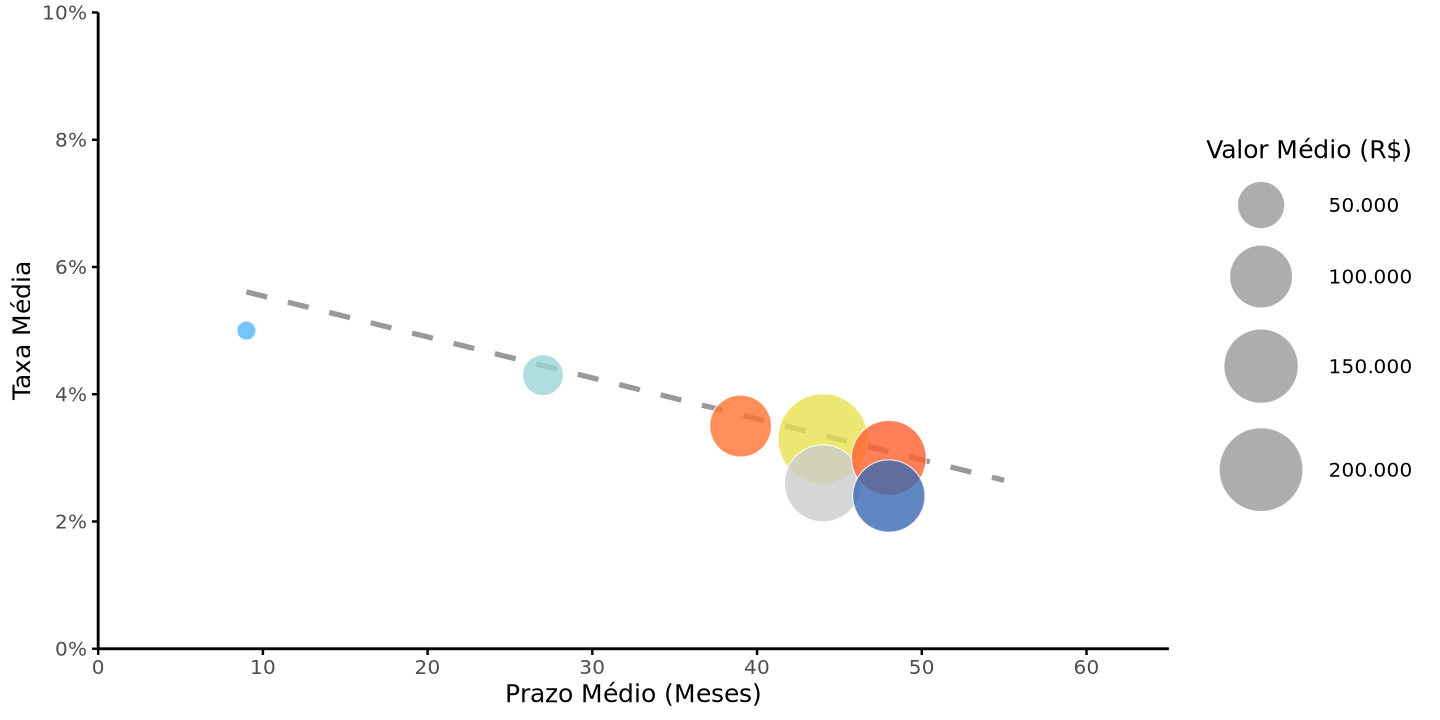

In [23]:
# Carregar bibliotecas
library(ggplot2)
library(dplyr)
library(scales)

# 1. Criar o dataframe com os novos dados
dados <- data.frame(
  Instituicao = c("BRADESCO", "BB", "SANTANDER", "OUTROS", "ITAU", "CAIXA", 
                  "COOPERATIVAS", "INTER", "C6", "PAGSEGURO", 
                  "NUBANK", "MERCADO PAGO"),
  Valor_Medio = c(381259.02, 237627.16, 166781.72, 162906.91, 152631.56, 140366.44, 
                  124872.57, 95849.41, 62197.02, 36051.78, 24671.09, 14959.44),
  Prazo_Medio = c(55, 44, 40, 44, 48, 48, 49, 39, 34, 27, 19, 9),
  Taxa_Texto = c("3,0%", "3,3%", "4,2%", "2,6%", "3,0%", "2,4%", 
                 "3,4%", "3,5%", "4,4%", "4,3%", "5,8%", "5,0%")
)

# Converter Taxa para numérico
dados$Taxa_Media <- as.numeric(gsub(",", ".", gsub("%", "", dados$Taxa_Texto)))


# --- NOVIDADE: Cálculo da Regressão e Filtro ---
modelo <- lm(Taxa_Media ~ Prazo_Medio, data = dados)
dados$Predito <- predict(modelo)
dados_filtrados <- dados %>% filter(Taxa_Media < Predito)
# ----------------------------------------------

# 2. Criar o Gráfico
p <- ggplot(dados, aes(x = Prazo_Medio, y = Taxa_Media)) +
  # Linha de Regressão: Mantemos os 'dados' completos para a linha não mudar de lugar
  geom_smooth(data = dados, method = "lm", se = FALSE, color = "#999999", 
              linetype = "dashed", linewidth = 1.5) + 
  
  # Scatterplot: Usamos apenas os 'dados_filtrados' para mostrar só quem está acima
  geom_point(data = dados_filtrados, aes(size = Valor_Medio, fill = Instituicao), 
             shape = 21, color = "white", alpha = 0.8) +
  
  # Configuração de Cores (Nota: certifique-se que 'cores_instituicao' está definido ou use scale_fill_hue)
  scale_fill_manual(values = cores_instituicao) +
  
  # Configuração de Tamanho
  scale_size_continuous(
    range = c(5, 25), 
    labels = comma_format(big.mark = ".", decimal.mark = ","),
    guide = guide_legend(override.aes = list(fill = "#999999"))
  ) +
  
  guides(fill = "none") + 
  
  scale_x_continuous(limits = c(0, 65), breaks = seq(0, 60, 10), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 10), breaks = seq(0, 10, 2), 
                     labels = function(x) paste0(x, "%"), expand = c(0, 0)) +
  
  labs(
    x = "Prazo Médio (Meses)",
    y = "Taxa Média",
    size = "Valor Médio (R$)"
  ) +
  
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    axis.line = element_line(color = "black", linewidth = 0.8),
    axis.ticks = element_line(color = "black"),
    legend.position = "right"
  )

# 3. Visualizar
print(p)

`geom_smooth()` using formula = 'y ~ x'


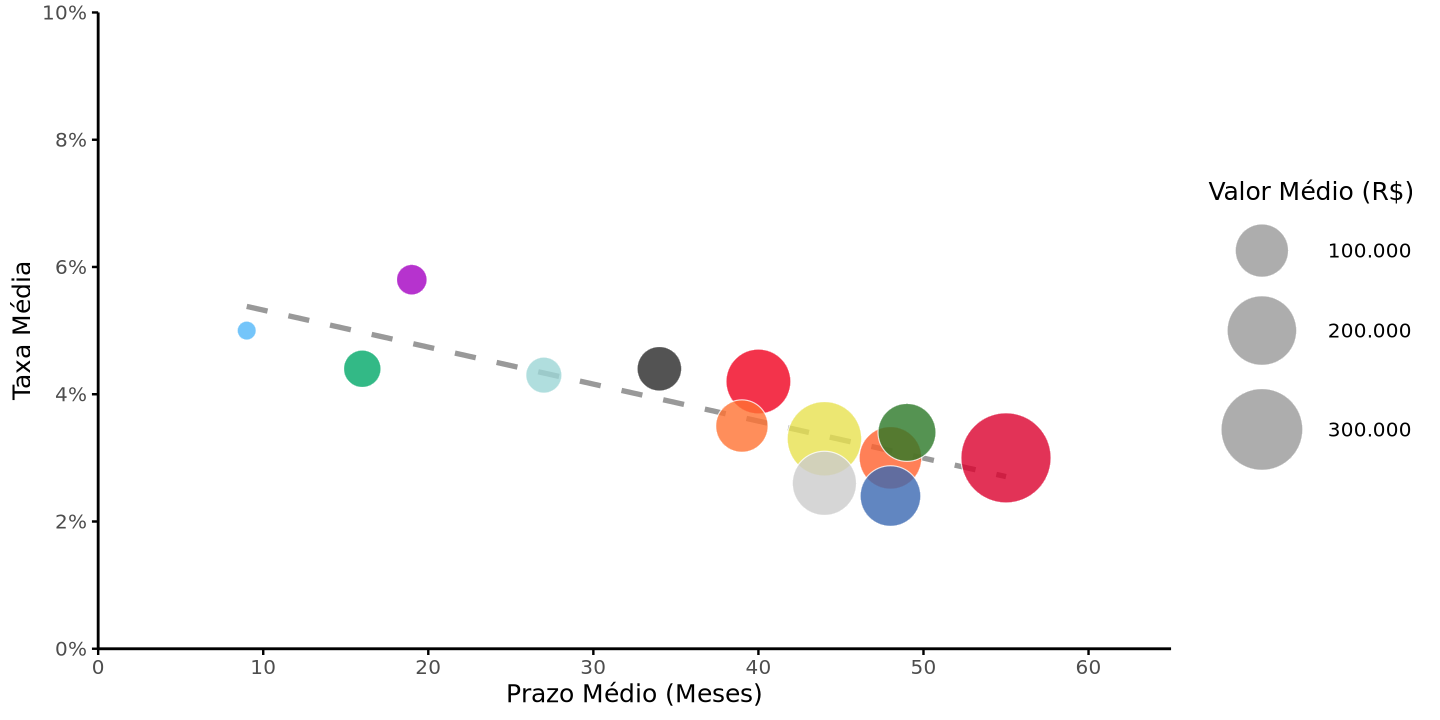

In [36]:
# Carregar bibliotecas
library(ggplot2)
library(dplyr)
library(scales)

# 1. Criar o dataframe com os novos dados
dados <- data.frame(
  Instituicao = c("STONE","BRADESCO", "BB", "SANTANDER", "OUTROS", "ITAU", "CAIXA", 
                  "COOPERATIVAS", "INTER", "C6", "PAGSEGURO", 
                  "NUBANK", "MERCADO PAGO"),
  Valor_Medio = c(39491.10,381259.02, 237627.16, 166781.72, 162906.91, 152631.56, 140366.44, 
                  124872.57, 95849.41, 62197.02, 36051.78, 24671.09, 14959.44),
  Prazo_Medio = c(16,55, 44, 40, 44, 48, 48, 49, 39, 34, 27, 19, 9),
  Taxa_Texto = c("4,4%","3,0%", "3,3%", "4,2%", "2,6%", "3,0%", "2,4%", 
                 "3,4%", "3,5%", "4,4%", "4,3%", "5,8%", "5,0%")
)

# Converter Taxa para numérico
dados$Taxa_Media <- as.numeric(gsub(",", ".", gsub("%", "", dados$Taxa_Texto)))

# 2. Criar o Gráfico
p <- ggplot(dados, aes(x = Prazo_Medio, y = Taxa_Media)) +
  # Linha de Regressão: Cor cinza da legenda e espessura aumentada (linewidth)
  geom_smooth(method = "lm", se = FALSE, color = "#999999", linetype = "dashed", linewidth = 1.5) + 
  
  # Scatterplot: fill mantém a cor nas bolas, mas show.legend = FALSE esconde a legenda de cores
  geom_point(aes(size = Valor_Medio, fill = Instituicao), 
             shape = 21, color = "white", alpha = 0.8) +
  
  # Configuração de Cores (aplicado às bolas)
  scale_fill_manual(values = cores_instituicao) +
  
  # Configuração de Tamanho (Mantém esta legenda visível)
  scale_size_continuous(
    range = c(5, 25), 
    labels = comma_format(big.mark = ".", decimal.mark = ","),
    guide = guide_legend(
      override.aes = list(fill = "#999999") # Cor cinza neutra para os círculos da legenda
    )
  ) +
  
  # REMOVE especificamente a legenda de cores/nomes das IFs
  guides(fill = "none") + 
  
  # Configuração dos eixos
  scale_x_continuous(limits = c(0, 65), breaks = seq(0, 60, 10), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 10), breaks = seq(0, 10, 2), 
                      labels = function(x) paste0(x, "%"), expand = c(0, 0)) +
  
  labs(
    x = "Prazo Médio (Meses)",
    y = "Taxa Média",
    size = "Valor Médio (R$)"
  ) +
  
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    axis.line = element_line(color = "black", linewidth = 0.8),
    axis.ticks = element_line(color = "black"),
    legend.position = "right"
  )

# 3. Visualizar
print(p)

`geom_smooth()` using formula = 'y ~ x'


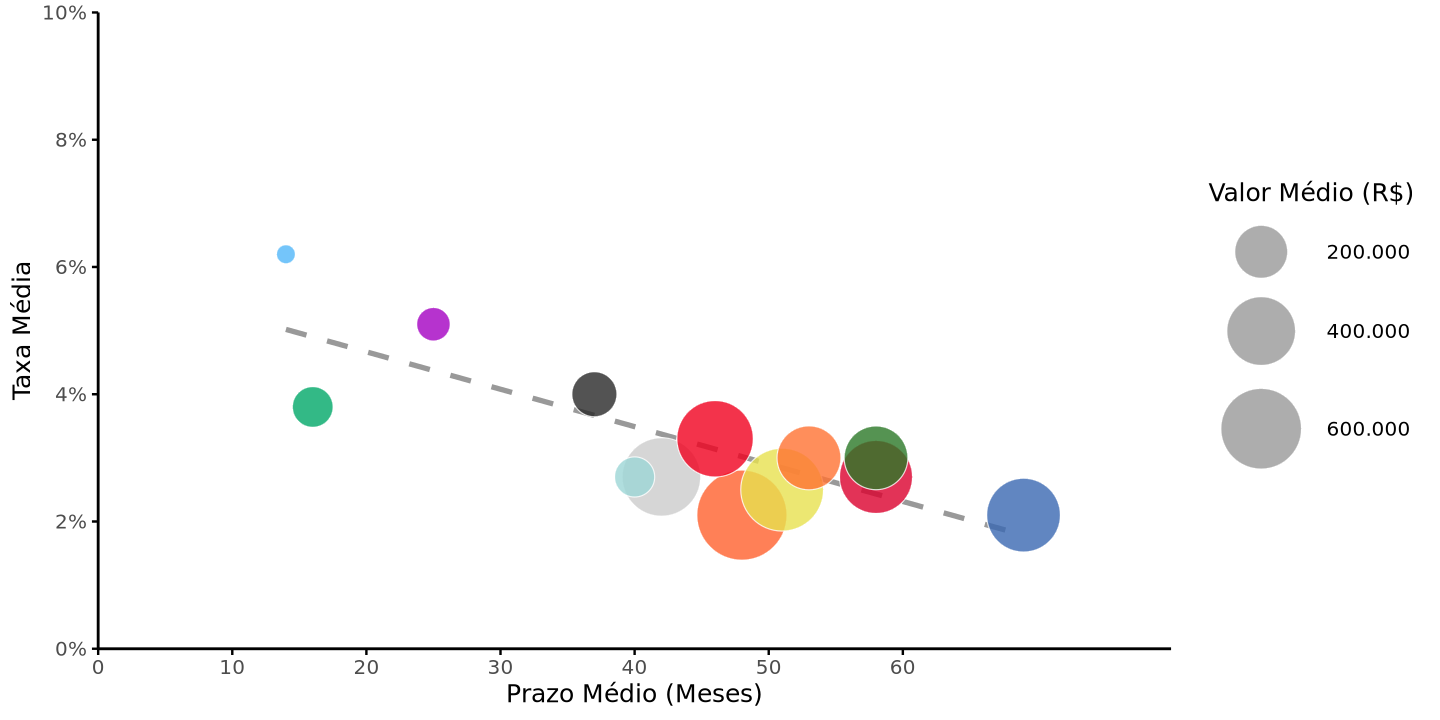

In [39]:
# Carregar bibliotecas
library(ggplot2)
library(dplyr)
library(scales)

# 1. Criar o dataframe com a nova base de dados
dados <- data.frame(
  Instituicao = c("STONE","ITAU", "BB", "OUTROS", "SANTANDER", "CAIXA", 
                  "BRADESCO", "INTER", "COOPERATIVAS", "C6", 
                  "PAGSEGURO", "NUBANK", "MERCADO PAGO"),
  Valor_Medio = c(97226.20,789444.83, 640950.56, 560072.53, 523932.25, 478388.37, 467272.85, 
                  330192.70, 327849.31, 128439.57, 93473.37, 57951.51, 25950.86),
  Prazo_Medio = c(16,48, 51, 42, 46, 69, 58, 53, 58, 37, 40, 25, 14),
  Taxa_Texto = c("3,8%","2,1%", "2,5%", "2,7%", "3,3%", "2,1%", "2,7%", 
                 "3,0%", "3,0%", "4,0%", "2,7%", "5,1%", "6,2%")
)

# Converter Taxa para numérico
dados$Taxa_Media <- as.numeric(gsub(",", ".", gsub("%", "", dados$Taxa_Texto)))

# 2. Criar o Gráfico
p <- ggplot(dados, aes(x = Prazo_Medio, y = Taxa_Media)) +
  # Linha de Regressão: Cor cinza da legenda e espessura aumentada (linewidth)
  geom_smooth(method = "lm", se = FALSE, color = "#999999", linetype = "dashed", linewidth = 1.5) + 
  
  # Scatterplot: fill mantém a cor nas bolas, mas show.legend = FALSE esconde a legenda de cores
  geom_point(aes(size = Valor_Medio, fill = Instituicao), 
             shape = 21, color = "white", alpha = 0.8) +
  
  # Configuração de Cores (aplicado às bolas)
  scale_fill_manual(values = cores_instituicao) +
  
  # Configuração de Tamanho (Mantém esta legenda visível)
  scale_size_continuous(
    range = c(5, 25), 
    labels = comma_format(big.mark = ".", decimal.mark = ","),
    guide = guide_legend(
      override.aes = list(fill = "#999999") # Cor cinza neutra para os círculos da legenda
    )
  ) +
  
  # REMOVE especificamente a legenda de cores/nomes das IFs
  guides(fill = "none") + 
  
  # Configuração dos eixos
  scale_x_continuous(limits = c(0, 80), breaks = seq(0, 60, 10), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 10), breaks = seq(0, 10, 2), 
                      labels = function(x) paste0(x, "%"), expand = c(0, 0)) +
  
  labs(
    x = "Prazo Médio (Meses)",
    y = "Taxa Média",
    size = "Valor Médio (R$)"
  ) +
  
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    axis.line = element_line(color = "black", linewidth = 0.8),
    axis.ticks = element_line(color = "black"),
    legend.position = "right"
  )

# 3. Visualizar
print(p)

#### Gráfico do Slide de Condições por IF e ESTEIRA

`geom_smooth()` using formula = 'y ~ x'


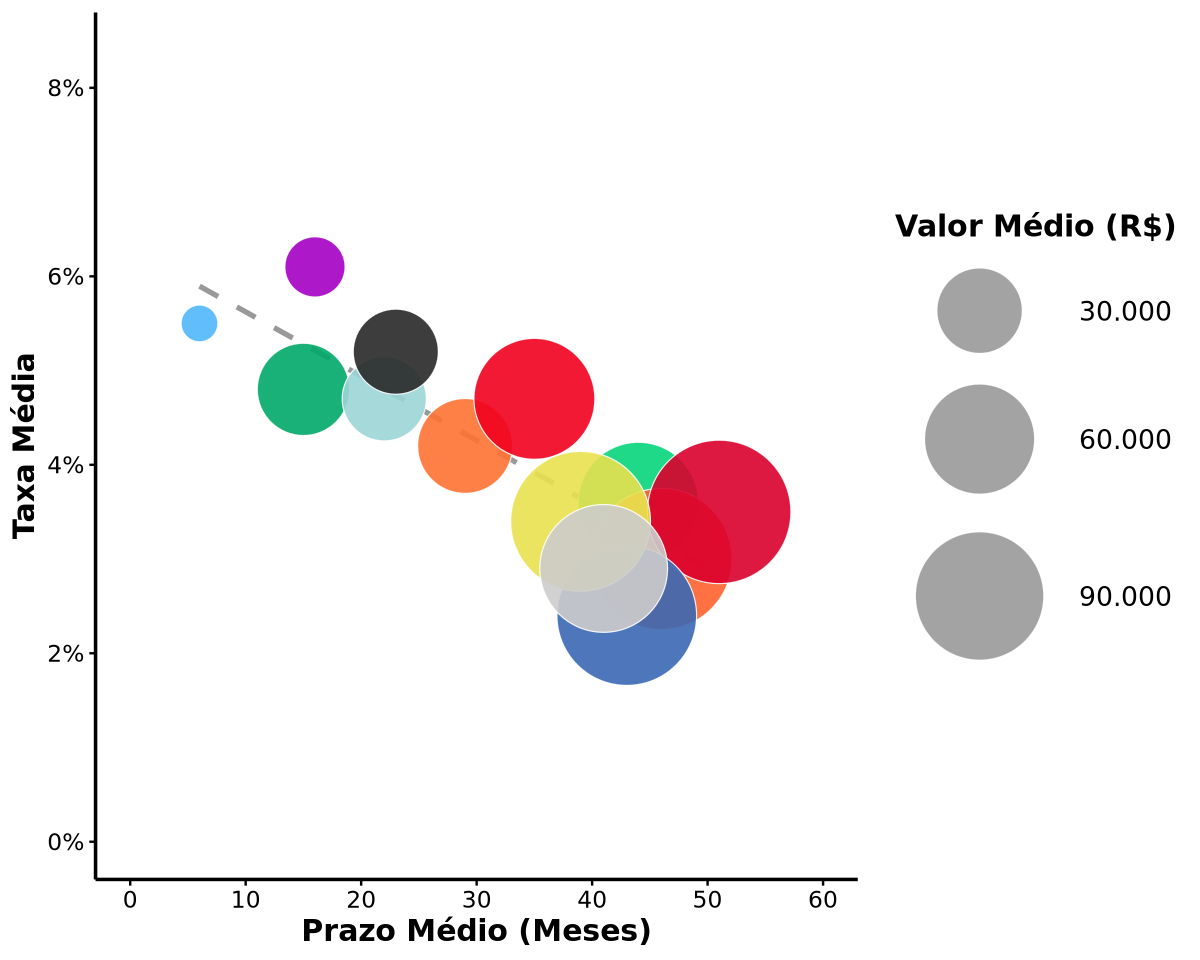

In [32]:
# 1. Criar o dataframe com a base de dados fornecida
dados <- data.frame(
  Instituicao = c("STONE", "PAGSEGURO", "NUBANK", "C6", "INTER", "MERCADO PAGO", 
                  "SANTANDER", "COOPERATIVAS", "ITAU", "BRADESCO", "CAIXA", 
                  "BB", "OUTROS"),
  
  # Valores convertidos de 'K' para numérico real
  Valor_Medio = c(37000, 28700, 11800, 29600, 40000, 6300, 
                  76800, 76000, 114800, 119700, 111800, 112100, 88800),
  
  # Prazos conforme a sequência da tabela
  Prazo_Medio = c(15, 22, 16, 23, 29, 6, 
                  35, 44, 46, 51, 43, 39, 41),
  
  # Taxas em formato de texto conforme solicitado
  Taxa_Texto = c("4,8%", "4,7%", "6,1%", "5,2%", "4,2%", "5,5%", 
                 "4,7%", "3,6%", "3,0%", "3,5%", "2,4%", "3,4%", "2,9%")
)

# Converter Taxa para numérico
dados$Taxa_Media <- as.numeric(gsub(",", ".", gsub("%", "", dados$Taxa_Texto)))

# 2. Criar o Gráfico
p <- ggplot(dados, aes(x = Prazo_Medio, y = Taxa_Media)) +
  # Linha de Regressão
  geom_smooth(method = "lm", se = FALSE, color = "#999999", linetype = "dashed", linewidth = 1.5) + 
  
  # Scatterplot: Aumentamos a transparência (alpha) para 0.9 para preencher mais visualmente
  geom_point(aes(size = Valor_Medio, fill = Instituicao), 
             shape = 21, color = "white", alpha = 0.9) +
  
  scale_fill_manual(values = cores_instituicao) +
  
  # 1. AUMENTAR AS BOLAS: Ajustamos o range (ex: de 10 a 40)
  scale_size_continuous(
    range = c(10, 40), 
    labels = comma_format(big.mark = ".", decimal.mark = ","),
    guide = guide_legend(
      override.aes = list(fill = "#999999")
    )
  ) +
  
  guides(fill = "none") + 
  
  # 2. DIMINUIR ESPAÇO BRANCO: Ajustamos o 'expand' para as bolas não ficarem coladas na borda, 
  # mas também não deixarem um vazio enorme.
  scale_x_continuous(limits = c(0, 60), breaks = seq(0, 60, 10), expand = expansion(mult = c(0.05, 0.05))) +
  scale_y_continuous(limits = c(0, 8), breaks = seq(0, 8, 2), 
                     labels = function(x) paste0(x, "%"), expand = expansion(mult = c(0.05, 0.1))) +
  
  labs(
    x = "Prazo Médio (Meses)",
    y = "Taxa Média",
    size = "Valor Médio (R$)"
  ) +
  
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    axis.line = element_line(color = "black", linewidth = 1),
    axis.ticks = element_line(color = "black"),
    
    # 3. AUMENTAR FONTE DA LEGENDA E TEXTOS
    legend.title = element_text(size = 18, face = "bold"), # Título da legenda maior
    legend.text = element_text(size = 16),                # Números da legenda maiores
    axis.title = element_text(size = 18, face = "bold"),  # Títulos dos eixos
    axis.text = element_text(size = 14, color = "black"), # Números dos eixos
    legend.key.height = unit(1.5, "cm")                   # Aumenta o espaço vertical entre os itens da legenda
  )

print(p)

`geom_smooth()` using formula = 'y ~ x'


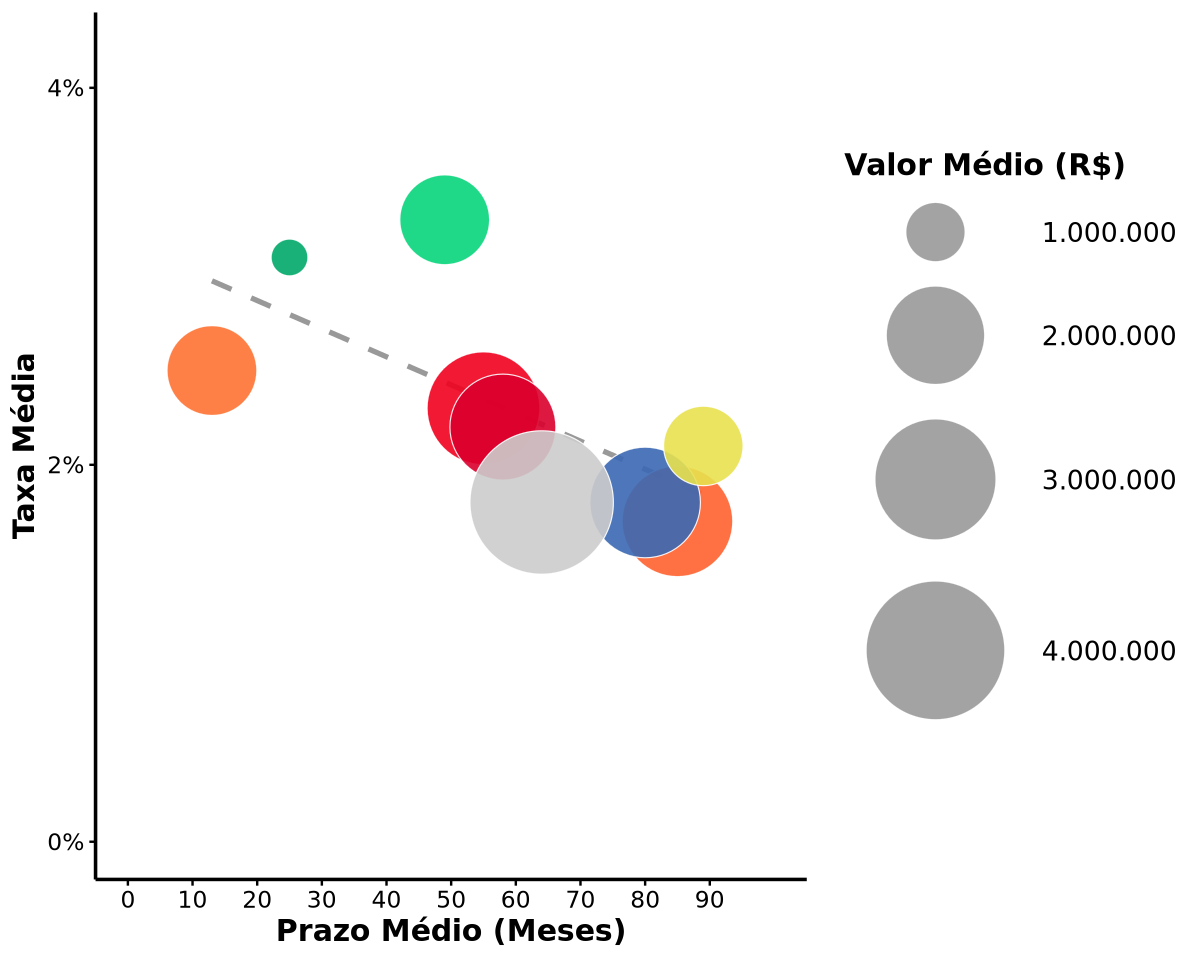

In [30]:
# 1. Criar o dataframe com a nova base de dados
dados <- data.frame(
  Instituicao = c("STONE", "INTER", "SANTANDER", "COOPERATIVAS", "ITAU", 
                  "BRADESCO", "CAIXA", "BB", "OUTROS"),
  
  # Valores convertidos (K = x1.000, M = x1.000.000)
  Valor_Medio = c(845500, 1700000, 2600000, 1700000, 2500000, 
                  2300000, 2500000, 1400000, 4300000),
  
  # Prazos extraídos da sequência fornecida
  Prazo_Medio = c(25, 13, 55, 49, 85, 58, 80, 89, 64),
  
  # Taxas em formato de texto
  Taxa_Texto = c("3,1%", "2,5%", "2,3%", "3,3%", "1,7%", 
                 "2,2%", "1,8%", "2,1%", "1,8%")
)

# Converter Taxa para numérico
dados$Taxa_Media <- as.numeric(gsub(",", ".", gsub("%", "", dados$Taxa_Texto)))

# 2. Criar o Gráfico
p <- ggplot(dados, aes(x = Prazo_Medio, y = Taxa_Media)) +
  # Linha de Regressão
  geom_smooth(method = "lm", se = FALSE, color = "#999999", linetype = "dashed", linewidth = 1.5) + 
  
  # Scatterplot: Aumentamos a transparência (alpha) para 0.9 para preencher mais visualmente
  geom_point(aes(size = Valor_Medio, fill = Instituicao), 
             shape = 21, color = "white", alpha = 0.9) +
  
  scale_fill_manual(values = cores_instituicao) +
  
  # 1. AUMENTAR AS BOLAS: Ajustamos o range (ex: de 10 a 40)
  scale_size_continuous(
    range = c(10, 40), 
    labels = comma_format(big.mark = ".", decimal.mark = ","),
    guide = guide_legend(
      override.aes = list(fill = "#999999")
    )
  ) +
  
  guides(fill = "none") + 
  
  # 2. DIMINUIR ESPAÇO BRANCO: Ajustamos o 'expand' para as bolas não ficarem coladas na borda, 
  # mas também não deixarem um vazio enorme.
  scale_x_continuous(limits = c(0, 100), breaks = seq(0, 90, 10), expand = expansion(mult = c(0.05, 0.05))) +
  scale_y_continuous(limits = c(0, 4), breaks = seq(0, 8, 2), 
                     labels = function(x) paste0(x, "%"), expand = expansion(mult = c(0.05, 0.1))) +
  
  labs(
    x = "Prazo Médio (Meses)",
    y = "Taxa Média",
    size = "Valor Médio (R$)"
  ) +
  
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    axis.line = element_line(color = "black", linewidth = 1),
    axis.ticks = element_line(color = "black"),
    
    # 3. AUMENTAR FONTE DA LEGENDA E TEXTOS
    legend.title = element_text(size = 18, face = "bold"), # Título da legenda maior
    legend.text = element_text(size = 16),                # Números da legenda maiores
    axis.title = element_text(size = 18, face = "bold"),  # Títulos dos eixos
    axis.text = element_text(size = 14, color = "black"), # Números dos eixos
    legend.key.height = unit(1.5, "cm")                   # Aumenta o espaço vertical entre os itens da legenda
  )

print(p)